# Tennis Ace

## Project Goals

You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Project Requirements

“Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in **tennis_stats.csv** is data from the men’s professional tennis league, which is called the <a href="https://www.atptour.com/" target='_blank'>ATP (Association of Tennis Professionals)</a>. Data from the top 1500 ranked players in the ATP over the span of `2009` to `2017` are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [4]:
stats = pd.read_csv('tennis_stats.csv')
stats.head(50)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,...,0.10,0.26,9,0.67,0.44,0.64,0,1,10434,495
6,Eduardo Struvay,2014,0.76,0.65,0.31,0.36,0.41,1,0.29,6,...,0.20,0.35,9,0.56,0.45,0.58,0,1,24218,1107
7,Riccardo Bellotti,2017,0.76,0.55,0.35,0.39,0.41,0,0.50,9,...,0.31,0.37,14,0.57,0.45,0.51,0,1,61154,432
8,Austin Krajicek,2017,0.76,0.78,0.16,0.57,0.49,9,0.25,3,...,0.06,0.30,16,0.88,0.50,0.73,0,1,52940,291
9,Guilherme Clezar,2011,0.76,0.56,0.24,0.46,0.13,3,0.00,5,...,0.00,0.21,8,0.63,0.38,0.54,0,1,18829,241


The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

## Identifying Data

-   ` Player`: name of the tennis player
-    `Year`: year data was recorded

## Service Game Columns (Offensive)

-    `Aces`: number of serves by the player where the receiver does not touch the ball
-    `DoubleFaults`: number of times player missed both first and second serve attempts
-    `FirstServe`: % of first-serve attempts made
-    `FirstServePointsWon`: % of first-serve attempt points won by the player
-    `SecondServePointsWon`: % of second-serve attempt points won by the player
-    `BreakPointsFaced`: number of times where the receiver could have won service game of the player
-    `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance
-    `ServiceGamesPlayed`: total number of games where the player served
-    `ServiceGamesWon`: total number of games where the player served and won
-    `TotalServicePointsWon`: % of points in games where the player served that they won

## Return Game Columns (Defensive)

-    `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win
-    `SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win
-    `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
-    `BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance
-    `ReturnGamesPlayed`: total number of games where the player’s opponent served
-    `ReturnGamesWon`: total number of games where the player’s opponent served and the player won
-    `ReturnPointsWon`: total number of points where the player’s opponent served and the player won
-    `TotalPointsWon`: % of points won by the player

## Outcomes

-    `Wins`: number of matches won in a year
-    `Losses`: number of matches lost in a year
-    `Winnings`: total winnings in USD($) in a year
-    `Ranking`: ranking at the end of year

3. Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

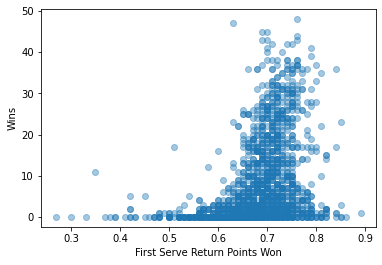

In [11]:
plt.scatter(stats['FirstServePointsWon'], stats['Wins'], alpha=0.4)
plt.ylabel('Wins')
plt.xlabel('First Serve Return Points Won')
plt.show()

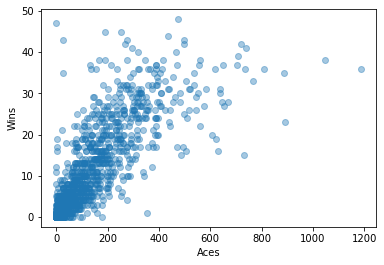

In [12]:
plt.scatter(stats['Aces'], stats['Wins'], alpha=0.4)
plt.ylabel('Wins')
plt.xlabel('Aces')
plt.show()

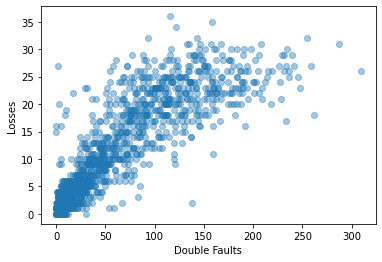

In [13]:
plt.scatter(stats['DoubleFaults'], stats['Losses'], alpha=0.4)
plt.ylabel('Losses')
plt.xlabel('Double Faults')
plt.show()

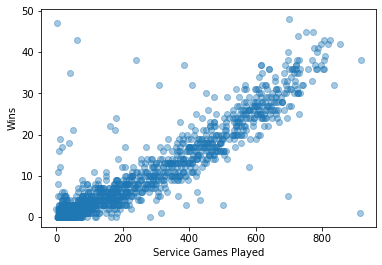

In [18]:
plt.scatter(stats['ServiceGamesPlayed'], stats['Wins'], alpha=0.4)
plt.ylabel('Wins')
plt.xlabel('Service Games Played')
plt.show()

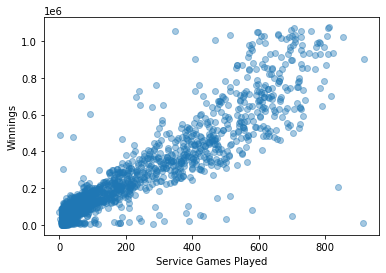

In [19]:
plt.scatter(stats['ServiceGamesPlayed'], stats['Winnings'], alpha=0.4)
plt.ylabel('Winnings')
plt.xlabel('Service Games Played')
plt.show()

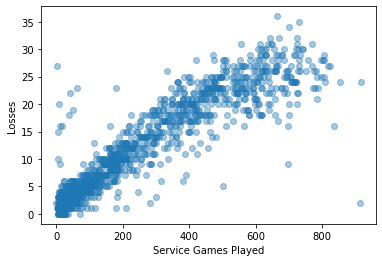

In [16]:
plt.scatter(stats['ServiceGamesPlayed'], stats['Losses'], alpha=0.4)
plt.ylabel('Losses')
plt.xlabel('Service Games Played')
plt.show()

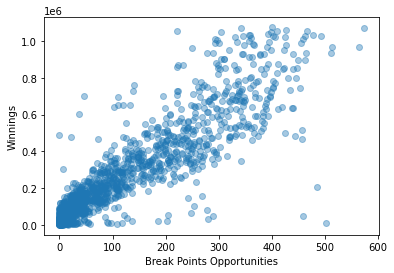

In [17]:
plt.scatter(stats['BreakPointsOpportunities'], stats['Winnings'], alpha=0.4)
plt.ylabel('Winnings')
plt.xlabel('Break Points Opportunities')
plt.show()

4. Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

In [34]:
feature = stats[['ServiceGamesPlayed']]
outcome = stats[['Wins']]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(feature_train, outcome_train)
model.score(feature_test, outcome_test)

0.8482433568190804

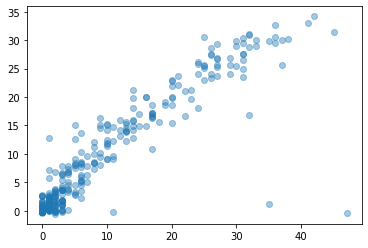

In [35]:
outcome_predict = model.predict(feature_test)

plt.scatter(outcome_test, outcome_predict, alpha = 0.4)
plt.show()

In [36]:
feature = stats[['Aces']]
outcome = stats[['Wins']]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(feature_train, outcome_train)
model.score(feature_test, outcome_test)

0.6626421969769964

In [37]:
feature = stats[['DoubleFaults']]
outcome = stats[['Losses']]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(feature_train, outcome_train)
model.score(feature_test, outcome_test)

0.7569851302848511

In [38]:
feature = stats[['ServiceGamesPlayed']]
outcome = stats[['Winnings']]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(feature_train, outcome_train)
model.score(feature_test, outcome_test)

0.8279877501146929

In [41]:
feature = stats[['ServiceGamesPlayed']]
outcome = stats[['Losses']]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(feature_train, outcome_train)
model.score(feature_test, outcome_test)

0.8708029091738463

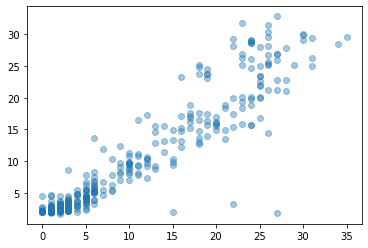

In [42]:
outcome_predict = model.predict(feature_test)

plt.scatter(outcome_test, outcome_predict, alpha = 0.4)
plt.show()

In [40]:
feature = stats[['BreakPointsOpportunities']]
outcome = stats[['Winnings']]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(feature_train, outcome_train)
model.score(feature_test, outcome_test)

0.8081205523550062

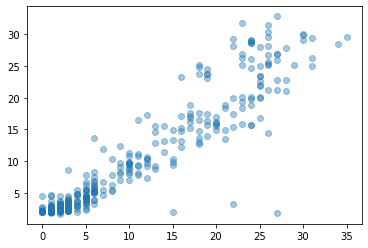

In [43]:
outcome_predict = model.predict(feature_test)

plt.scatter(outcome_test, outcome_predict, alpha = 0.4)
plt.show()

*Sevice Games Played vs. Losses gave me the best single feature linear regression.*

6. Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?


In [45]:
features = stats[['ServiceGamesPlayed', 'BreakPointsOpportunities']]
outcome = stats[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(features_train, outcome_train)
model.score(features_test, outcome_test)

0.8303528220567031

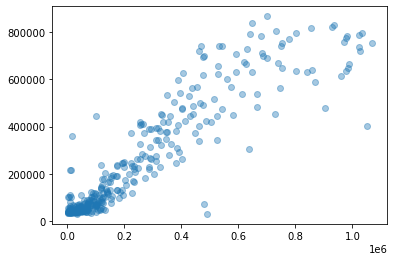

In [46]:
outcome_predict = model.predict(features_test)

plt.scatter(outcome_test, outcome_predict, alpha = 0.4)
plt.show()

In [47]:
features = stats[['FirstServeReturnPointsWon', 'BreakPointsOpportunities']]
outcome = stats[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(features_train, outcome_train)
model.score(features_test, outcome_test)

0.8099289371304075

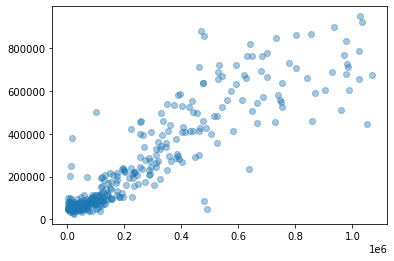

In [48]:
outcome_predict = model.predict(features_test)

plt.scatter(outcome_test, outcome_predict, alpha = 0.4)
plt.show()

In [49]:
features = stats[['FirstServeReturnPointsWon', 'SecondServePointsWon']]
outcome = stats[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(features_train, outcome_train)
model.score(features_test, outcome_test)

0.13115484088414509

*Service Games Played vs. Break Points Opportunities gave the best model for the set of two features I chose.*

7. Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

    Head to the Codecademy forums and share your set of features that resulted in the highest test score for predicting your outcome. What features are most important for being a successful tennis player?


In [50]:
features = stats[['ServiceGamesPlayed', 'BreakPointsOpportunities', 'Aces']]
outcome = stats[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(features_train, outcome_train)
model.score(features_test, outcome_test)

0.8287010684306161

In [51]:
features = stats[['ServiceGamesPlayed', 'BreakPointsOpportunities', 'Aces', 'DoubleFaults']]
outcome = stats[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(features_train, outcome_train)
model.score(features_test, outcome_test)

0.8259043803351076

In [52]:
features = stats[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = stats[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2, random_state=6)

model = LinearRegression()
model.fit(features_train, outcome_train)
model.score(features_test, outcome_test)

0.8290563866666129

*The set of features that includes the most features gives the best model. If a tennis player has a good serve where the opponent can't hit the ball, that seems like a good indicator of a good player.*